In [1]:
#from __future__ import print_function

## Define the purpose of the ML project

The purpose of this project is to investigate the feasibility of machine learning in 
effectively predicting the energy, or calorie content, of ingredients used in recipes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.precision', 6)
pd.options.display.float_format = '{:.6f}'.format
%matplotlib inline

## Obtain the data set for the analysis

The data has been obtained through the Gov.UK website and is a concise reference to food composition in the UK.

### Food Categories (Types and Groups)

These are dependancies found in the ['McCance & Widdowson's Composition of Foods Integrated Dataset 2021' dataset User Guide](https://www.gov.uk/government/publications/composition-of-foods-integrated-dataset-cofid) in PDF format and have been converted to CSV format.

In [3]:
df_groups = pd.read_csv("./data/McCance_Widdowsons_Composition_of_Foods_Integrated_Dataset_2021_Categories.csv")
# Create two dictionaries for the group name and their base group type - we will term these group_names and group_types
COFID_group_names = df_groups.set_index('Group')['Group Name'].to_dict()
COFID_group_types = {key: value for key, value in COFID_group_names.items() if len(key) == 1}

### Food Composition Data

Now, we are loading files various supplements of the food composition data with the intention of merging them together. The data is split across these three files:

1. Inorganic Composition
2. Vitamin Composition
3. Proximate Composition

These are found in the ['McCance & Widdowson's Composition of Foods Integrated Dataset 2021' dataset User Guide](https://www.gov.uk/government/publications/composition-of-foods-integrated-dataset-cofid) in PDF format and have been converted to CSV format.


In [4]:
df_inorganics = pd.read_csv("./data/McCance_Widdowsons_Composition_of_Foods_Integrated_Dataset_2021_Inorganics.csv")
df_vitamins = pd.read_csv("./data/McCance_Widdowsons_Composition_of_Foods_Integrated_Dataset_2021_Vitamins.csv")
df_proximates = pd.read_csv("./data/McCance_Widdowsons_Composition_of_Foods_Integrated_Dataset_2021_Proximates.csv")

## Explore, clean and preprocess the data

Here we will look at missing data and outliners, cleaning and arranging into a useable format.

### Initial Data Cleaning

Extra header rows are left at the head of the import data. We will trim this off.

In [5]:
df_inorganics.head(3)

,Food Code,Food Name,Description,Group,Previous,Main data references,Footnote,Sodium (mg),Potassium (mg),Calcium (mg),...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sodium,Potassium,Calcium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13-145,"Ackee, canned, drained",8 cans,DG,554,"MW4, 1978; and Vegetables, Herbs and Spices Su...",NaN,240,270,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Trim off two rows at the top
df_inorganics = df_inorganics.iloc[2:]
df_vitamins = df_vitamins.iloc[2:]
df_proximates = df_proximates.iloc[2:]
df_inorganics.head(3)

,Food Code,Food Name,Description,Group,Previous,Main data references,Footnote,Sodium (mg),Potassium (mg),Calcium (mg),...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
2,13-145,"Ackee, canned, drained",8 cans,DG,554,"MW4, 1978; and Vegetables, Herbs and Spices Su...",NaN,240,270,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13-146,"Agar, dried",Literature sources,DG,NaN,Wu Leung et al. (1972) Food composition table ...,NaN,110,110,760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13-147,"Agar, dried, soaked and drained",Literature sources,DG,NaN,Wu Leung et al. (1972) Food composition table ...,NaN,10,20,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some columns termed as 'Unnamed' exist and need to be removed.

In [7]:
df_inorganics.columns

Index(['Food Code', 'Food Name', 'Description', 'Group', 'Previous',
       'Main data references', 'Footnote', 'Sodium (mg)', 'Potassium (mg)',
       'Calcium (mg)', 'Magnesium (mg)', 'Phosphorus (mg)', 'Iron (mg)',
       'Copper (mg)', 'Zinc (mg)', 'Chloride (mg)', 'Manganese (mg)',
       'Selenium (µg)', 'Iodine (µg)', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46'],
      dtype='object')

In [8]:
# Remove unnamed columns
df_inorganics = df_inorganics.loc[:, ~df_inorganics.columns.str.contains('^Unnamed')]
df_vitamins = df_vitamins.loc[:, ~df_vitamins.columns.str.contains('^Unnamed')]
df_proximates = df_proximates.loc[:, ~df_proximates.columns.str.contains('^Unnamed')]

We will also remove columns that are not relevant to the analysis.

In [9]:
# Drop columns of no revalence
df_inorganics = df_inorganics.drop(['Food Name', 'Description', 'Main data references', 'Previous', 'Footnote', 'Group', 
                                    'Potassium (mg)', 'Calcium (mg)', 'Magnesium (mg)', 'Phosphorus (mg)', 
                                    'Iron (mg)', 'Copper (mg)', 'Zinc (mg)', 'Chloride (mg)',
                                    'Manganese (mg)', 'Selenium (µg)', 'Iodine (µg)'], axis=1)
df_proximates = df_proximates.drop(['Food Name', 'Description', 'Main data references', 'Previous', 'Footnote', 'Group', 'Glucose (g)', 'Oligosaccharide (g)',
                                    'Galactose (g)', 'Fructose (g)', 'Sucrose (g)', 'Maltose (g)', 'Total nitrogen (g)',
                                    'Lactose (g)', 'Alcohol (g)', 'NSP (g)', 'AOAC fibre (g)',
                                    'Satd FA /100g FA (g)', 'Satd FA /100g fd (g)', 'n-6 poly /100g FA (g)',
                                    'n-6 poly /100g food (g)', 'n-3 poly /100g FA (g)',
                                    'n-3 poly /100g food (g)', 'cis-Mono FA /100g FA (g)',
                                    'cis-Mono FA /100g Food (g)', 'Mono FA/ 100g FA (g)',
                                    'Mono FA /100g food (g)', 'cis-Polyu FA /100g FA (g)',
                                    'cis-Poly FA /100g Food (g)', 'Poly FA /100g FA (g)',
                                    'Poly FA /100g food (g)', 'Sat FA excl Br /100g FA (g)',
                                    'Sat FA excl Br /100g food (g)', 'Branched chain FA /100g FA (g)',
                                    'Branched chain FA /100g food (g)', 'Trans FAs /100g FA (g)',
                                    'Trans FAs /100g food (g)'], axis=1)
df_vitamins = df_vitamins.drop(['Previous', 'Description', 'Main data references', 'Footnote', 'Pantothenate (mg)', 'Biotin (µg)', 'Tryptophan/60 (mg)', 'Retinol Equivalent (µg)', 'Vitamin K1 (µg)', 'Niacin equivalent (mg)'], axis=1)

Next we will merge the dataframes together.

In [10]:
# Merge the dataframes
df = df_vitamins.merge(df_inorganics, on=['Food Code'], how='outer', suffixes=('', '_inorganic'))
df = df.merge(df_proximates, on=['Food Code'], how='outer', suffixes=('', '_proximates'))
df = df.merge(df_groups, on=['Group'], how='outer', suffixes=('_origin', '_offset'))

# Discard offset columns - left from the merge
df = df[[c for c in df.columns if not c.endswith('_offset')]]
df.reset_index(drop=True, inplace=True)
df.head(3)

,Food Code,Food Name,Group,Retinol (µg),Carotene (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),...,Water (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),Energy (kJ) (kJ),Starch (g),Total sugars (g),Cholesterol (mg),Group Name
0,11-788,"Porridge oats, unfortified",A,0,0,0.0,0.59,1.05,0.05,0.8,...,9.4,10.9,8.1,70.7,381,1614,70.4,0.3,0.3,Cereals and cereal products
1,11-789,"Porridge oats, unfortified, cooked, made up wi...",A,17,8,Tr,0.20,Tr,0.14,0.2,...,79.7,4.6,2.3,12.1,84,357,8.0,4.1,2.7,Cereals and cereal products
2,11-936,"Pizza, cheese and tomato, retail",A,119,91,Tr,1.68,0.15,0.15,1.0,...,38.1,12.2,9.8,36.1,272,1148,32.2,3.9,19.1,Cereals and cereal products


In [11]:
df.columns

Index(['Food Code', 'Food Name', 'Group', 'Retinol (µg)', 'Carotene (µg)',
       'Vitamin D (µg)', 'Vitamin E (mg)', 'Thiamin (mg)', 'Riboflavin (mg)',
       'Niacin (mg)', 'Vitamin B6 (mg)', 'Vitamin B12 (µg)', 'Folate (µg)',
       'Vitamin C (mg)', 'Sodium (mg)', 'Water (g)', 'Protein (g)', 'Fat (g)',
       'Carbohydrate (g)', 'Energy (kcal) (kcal)', 'Energy (kJ) (kJ)',
       'Starch (g)', 'Total sugars (g)', 'Cholesterol (mg)', 'Group Name'],
      dtype='object')

### Pre-processing

Rename some columns to make them more readable.

In [12]:
df = df.rename(columns={'Energy (kJ) (kJ)': 'Energy (kJ)', 'Energy (kcal) (kcal)': 'Energy (kcal)'})

We have some columns containing 'N' (Not sampled) and 'Tr' (Traces) values. We will just replace these with 0.

In [13]:
assign_dtypes = { x: 'float64' for x in df.columns if ")" in x }
for col in assign_dtypes.keys():
    df[col] = df[col].replace('Tr', 0) # look at traces later!
    df[col] = df[col].replace('N', 0)
    # print(col, is_numeric_dtype(df[col]))

We will also assign the columns to float64 data types.

In [14]:
# A crude method of assignment but it works
df = df.astype(assign_dtypes)

Next, we'll check for NaNs

In [15]:
df.isnull().sum().sum()

508

We have lots, but check for NaNs in the 'Food Name' column, which will form our input variables.

In [16]:
df['Food Name'].isnull().sum().sum()

20

In [17]:
df = df[df['Food Name'].notna()]

Ok, having now dropped those, let's look at the 'Energy (kJ)' column, which will be our target output variable.

In [18]:
df[df['Energy (kJ)'].isnull()]

,Food Code,Food Name,Group,Retinol (µg),Carotene (µg),Vitamin D (µg),Vitamin E (mg),Thiamin (mg),Riboflavin (mg),Niacin (mg),...,Water (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal),Energy (kJ),Starch (g),Total sugars (g),Cholesterol (mg),Group Name
2135,18-499,"Pork, spare ribs, Chinese barbecue, takeaway",MAG,7.000000,26.000000,0.000000,0.840000,0.000000,0.000000,0.000000,...,49.800000,22.100000,18.700000,NaN,NaN,NaN,NaN,NaN,NaN,Pork


There is 1 NaN. Considering this food is unhealthly let's set it to the mean for all ribs. 

In [19]:
df.loc[df[df['Energy (kJ)'].isnull()].index,"Energy (kJ)"] = df[df['Food Name'].astype(str).str.contains('ribs')==True]['Energy (kJ)'].mean()

Check again for NaNs in the 'Energy (kJ)' and 'Food Name' column.

In [20]:
df[df[['Energy (kJ)','Food Name']].isnull()].sum().sum()

0.0

How many NaNs left now?

In [21]:
df.isnull().sum().sum()

47

We are safe to replace these NaNs with 0.

In [22]:
# NaNs - consider these as 0
df = df[df.columns].fillna(0)

Check for empty or low string Length in the Food Name column, which will form our input variables.

In [23]:
df[df['Food Name'].str.len()<3].count().sum()

0

All looks good.

We will be outputing Energy (kJ) as the target variable. Please note: Energy (kcal) is the same as Energy (kJ), but there are 0.239006 kcal in a kJ. Calorie conversion, kJ to kcal can be easily undertaken. 

Our mean is 800.913 kJ, with a standard deviation of 632.620 kJ. The minimum is 0 kJ and the maximum is 3702 kJ.

In [24]:
df['Energy (kJ)'].describe()

count   2893.000000
mean     800.912696
std      632.619524
min        0.000000
25%      340.000000
50%      658.000000
75%     1139.000000
max     3702.000000
Name: Energy (kJ), dtype: float64

Given we have a min of 0 kJ, a quick look at these items shows that should be relatively exempt from Energy (kJ) values.

In [25]:
df[df['Energy (kJ)']==0][['Food Name', 'Energy (kJ)']]

,Food Name,Energy (kJ)
1452,Lemon peel,0.000000
1515,Poppy seeds,0.000000
1565,"Allspice, ground",0.000000
1566,Anise seeds,0.000000
1567,Asafoetida,0.000000
1572,Caraway seeds,0.000000
1573,"Cardamom, ground",0.000000
1574,Celery seeds,0.000000
1576,Chinese 5 spice,0.000000
1577,"Cloves, dried",0.000000


Let's look for outliers in the Energy (kJ) column.

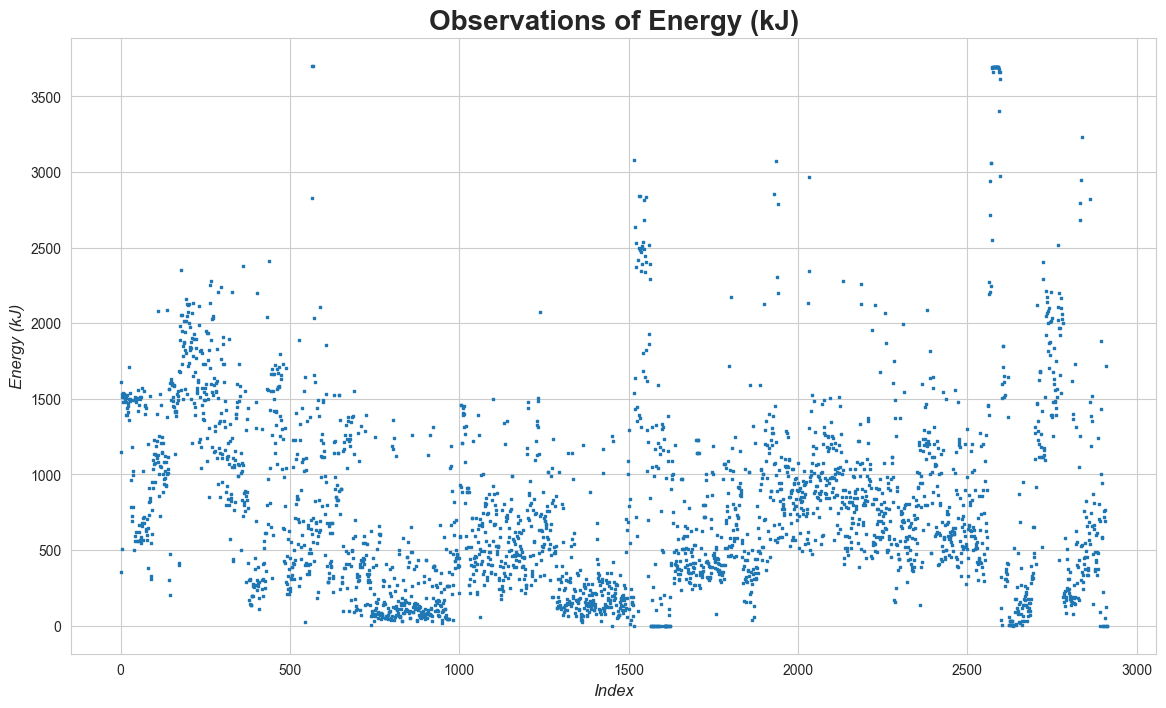

In [26]:
plt.figure(figsize=(14, 8))
plt.scatter(df.index, df['Energy (kJ)'], marker=',', s=1)
plt.title('Observations of Energy (kJ)', fontsize=20, fontweight='bold')
plt.xlabel('Index', fontsize=12, fontstyle='italic')
plt.ylabel('Energy (kJ)', fontsize=12, fontstyle='italic')
plt.show()

Looking at the top 10 Energy (kJ) values, they actually look correct. All fats.

In [27]:
df[df['Energy (kJ)']>3500][['Food Name', 'Energy (kJ)']].sort_values(by='Energy (kJ)', ascending=False).head(10)

,Food Name,Energy (kJ)
567,Ghee made from vegetable oil,3702.000000
566,"Cooking fat, compound, not polyunsaturated",3700.000000
2582,"Oil, peanut (groundnut)",3696.000000
2591,"Oil, vegetable, average",3696.000000
2590,"Oil, cod liver",3696.000000
2589,"Oil, wheatgerm",3696.000000
2588,"Oil, walnut",3696.000000
2587,"Oil, sunflower",3696.000000
2586,"Oil, soya",3696.000000
2584,"Oil, safflower",3696.000000


## Dimension reduction and feature engineering

We have already applied some dimension reduction, but here we will engineer some new features.

### Feature engineering

We have a 'Group' column which is a categorical variable and is useful for analysis. However, the 'Group Name' column is hierarchical with the first character being the main group type. We will create a 'Type' column to represent this.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from wordcloud import WordCloud

In [29]:
# Create the base food Type, which we will use to clossify the data later.
df['Type'] = df['Group'].astype(str).apply(lambda x: x[0])
df['Type Name'] = df['Type'].apply(lambda x: COFID_group_names[x])

The data is not in a highly useful format for analysis, so we will shuffle the columns around. Reorder for athetics.

In [30]:
# Taking inspiration..
# https://www.gov.uk/government/publications/technical-guidance-on-nutrition-labelling
# https://www.gov.uk/government/publications/food-supplements-guidance-and-faqs
cols = list(df.columns.values)
cols.insert(cols.index('Group'), cols.pop(cols.index('Type')))
cols.insert(cols.index('Type')+1, cols.pop(cols.index('Type Name')))
cols.insert(cols.index('Group')+1, cols.pop(cols.index('Group Name')))

# Layout closer to convention - Commission Directive 2008/100/EC2
layout = ['Energy (kJ)', 'Energy (kcal)', 'Cholesterol (mg)', 'Fat (g)', 'Protein (g)', 'Total sugars (g)', 'Carbohydrate (g)', 'Carotene (µg)', 'Vitamin D (µg)', 'Vitamin E (mg)', 'Niacin (mg)', 'Vitamin B6 (mg)', 'Folate (µg)', 'Vitamin B12 (µg)', 'Vitamin C (mg)', 'Sodium (mg)']
for l in reversed(layout):
    cols.insert(cols.index('Group Name')+1, cols.pop(cols.index(l)))
df = df[cols]

df.head(3)

,Food Code,Food Name,Type,Type Name,Group,Group Name,Energy (kJ),Energy (kcal),Cholesterol (mg),Fat (g),...,Vitamin B6 (mg),Folate (µg),Vitamin B12 (µg),Vitamin C (mg),Sodium (mg),Retinol (µg),Thiamin (mg),Riboflavin (mg),Water (g),Starch (g)
0,11-788,"Porridge oats, unfortified",A,Cereals and cereal products,A,Cereals and cereal products,1614.000000,381.000000,0.300000,8.100000,...,0.340000,32.000000,0.000000,0.000000,1.000000,0.000000,1.050000,0.050000,9.400000,70.400000
1,11-789,"Porridge oats, unfortified, cooked, made up wi...",A,Cereals and cereal products,A,Cereals and cereal products,357.000000,84.000000,2.700000,2.300000,...,0.090000,10.000000,0.300000,1.000000,39.000000,17.000000,0.000000,0.140000,79.700000,8.000000
2,11-936,"Pizza, cheese and tomato, retail",A,Cereals and cereal products,A,Cereals and cereal products,1148.000000,272.000000,19.100000,9.800000,...,0.000000,4.000000,0.400000,2.000000,397.000000,119.000000,0.150000,0.150000,38.100000,32.200000


Our plan is to predict the Energy (kJ) through the use of the 'Food Name' column, so we will use a CountVectorizer to convert the 'Food Name' column into a matrix of token counts.

We have added some stop words which are not so synonymous with Energy (kJ), such as 'homemade', 'flesh' and 'weighed'.

**Please note:** After much testing it is apparent that tailing the 'Food Name' with the 'Group Name' is the best approach, offering much better accuracy than using the 'Food Name' alone.

In [31]:
stop_words = text.ENGLISH_STOP_WORDS.union(['homemade', 'flesh', 'weighed', 'product', 'products', 'dishes', 'general'])

# Concat for the best predictions
df['Feature Names'] = df['Food Name'].astype(str) + ' ' + df['Group Name'].astype(str)

# create a word count
tokenizer = CountVectorizer(stop_words=list(stop_words))
_X = tokenizer.fit_transform(df['Feature Names'].astype(str))
features = tokenizer.get_feature_names_out()

# Convert to a DataFrame with same index
X = pd.DataFrame(_X.todense(), index=df.index, columns=features)

A quick look at the matrix

In [32]:
X.head(3)

,24,26,30,39,40,41,50,60,62,75,...,yam,yeast,yellow,yogurt,yogurts,yolk,yorkshire,young,yung,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's take a look at the Top 10 words associated with Food composition in our dataset

In [33]:
X.T.sum(axis=1).sort_values(ascending=False).head(10)

raw           463
vegetable     411
meat          315
fruit         314
fish          279
vegetables    263
lean          250
white         246
fat           242
beef          241
dtype: int64

We have some columns in the dataset which are numerical. We will remove these.

In [34]:
X.columns[:30]

Index(['24', '26', '30', '39', '40', '41', '50', '60', '62', '75', '80', '85',
       '90', '98', '99', 'abv', 'ackee', 'acorn', 'added', 'aduki', 'agar',
       'alaskan', 'alcohol', 'alcoholic', 'alfalfa', 'allsorts', 'allspice',
       'almond', 'almonds', 'aloo'],
      dtype='object')

In [35]:
X = X.filter(regex='^\D', axis=1)

Check the shape of matrix compared with the original dataset.

In [36]:
df.shape, X.shape

((2893, 28), (2893, 1432))

Now we have a well-formed matrix, we can view word frequency in a word cloud. There are 1432 words in the dataset after stopwords have been extracted.

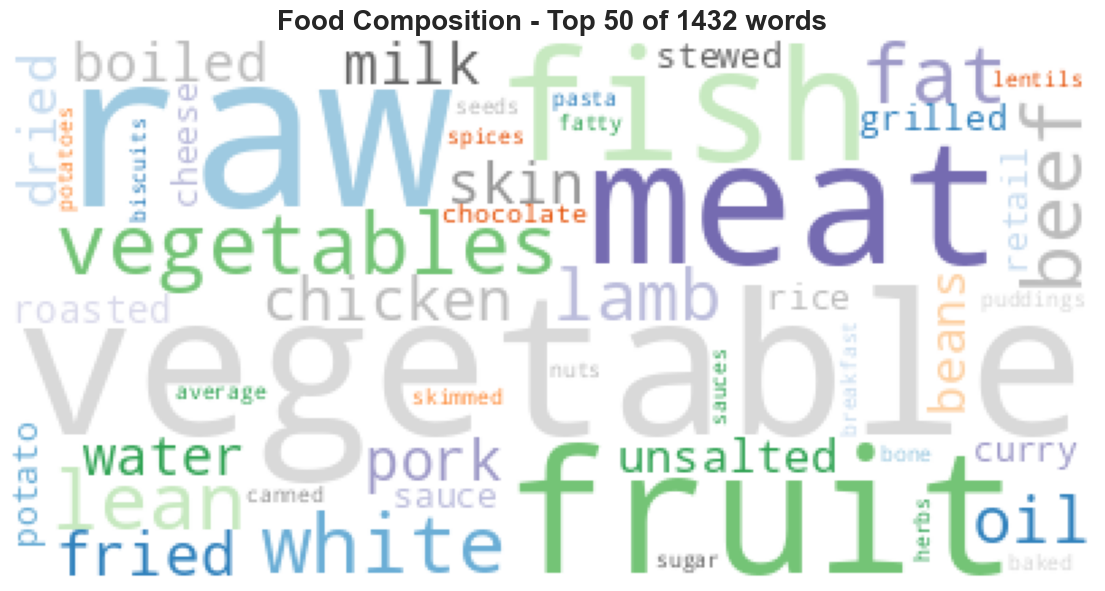

In [37]:
Cloud = WordCloud(background_color="white", colormap='tab20c', max_words=50).generate_from_frequencies(X.T.sum(axis=1))
plt.figure(figsize=(14, 8))
plt.title('Food Composition - Top 50 of ' + str(X.shape[1]) + ' words', fontsize=20, fontweight='bold')
plt.imshow(Cloud)
plt.axis("off")
plt.show()

We can also take a look at the word frequency by 'Type' in a word cloud. This helps us to see the most common words in each food type.

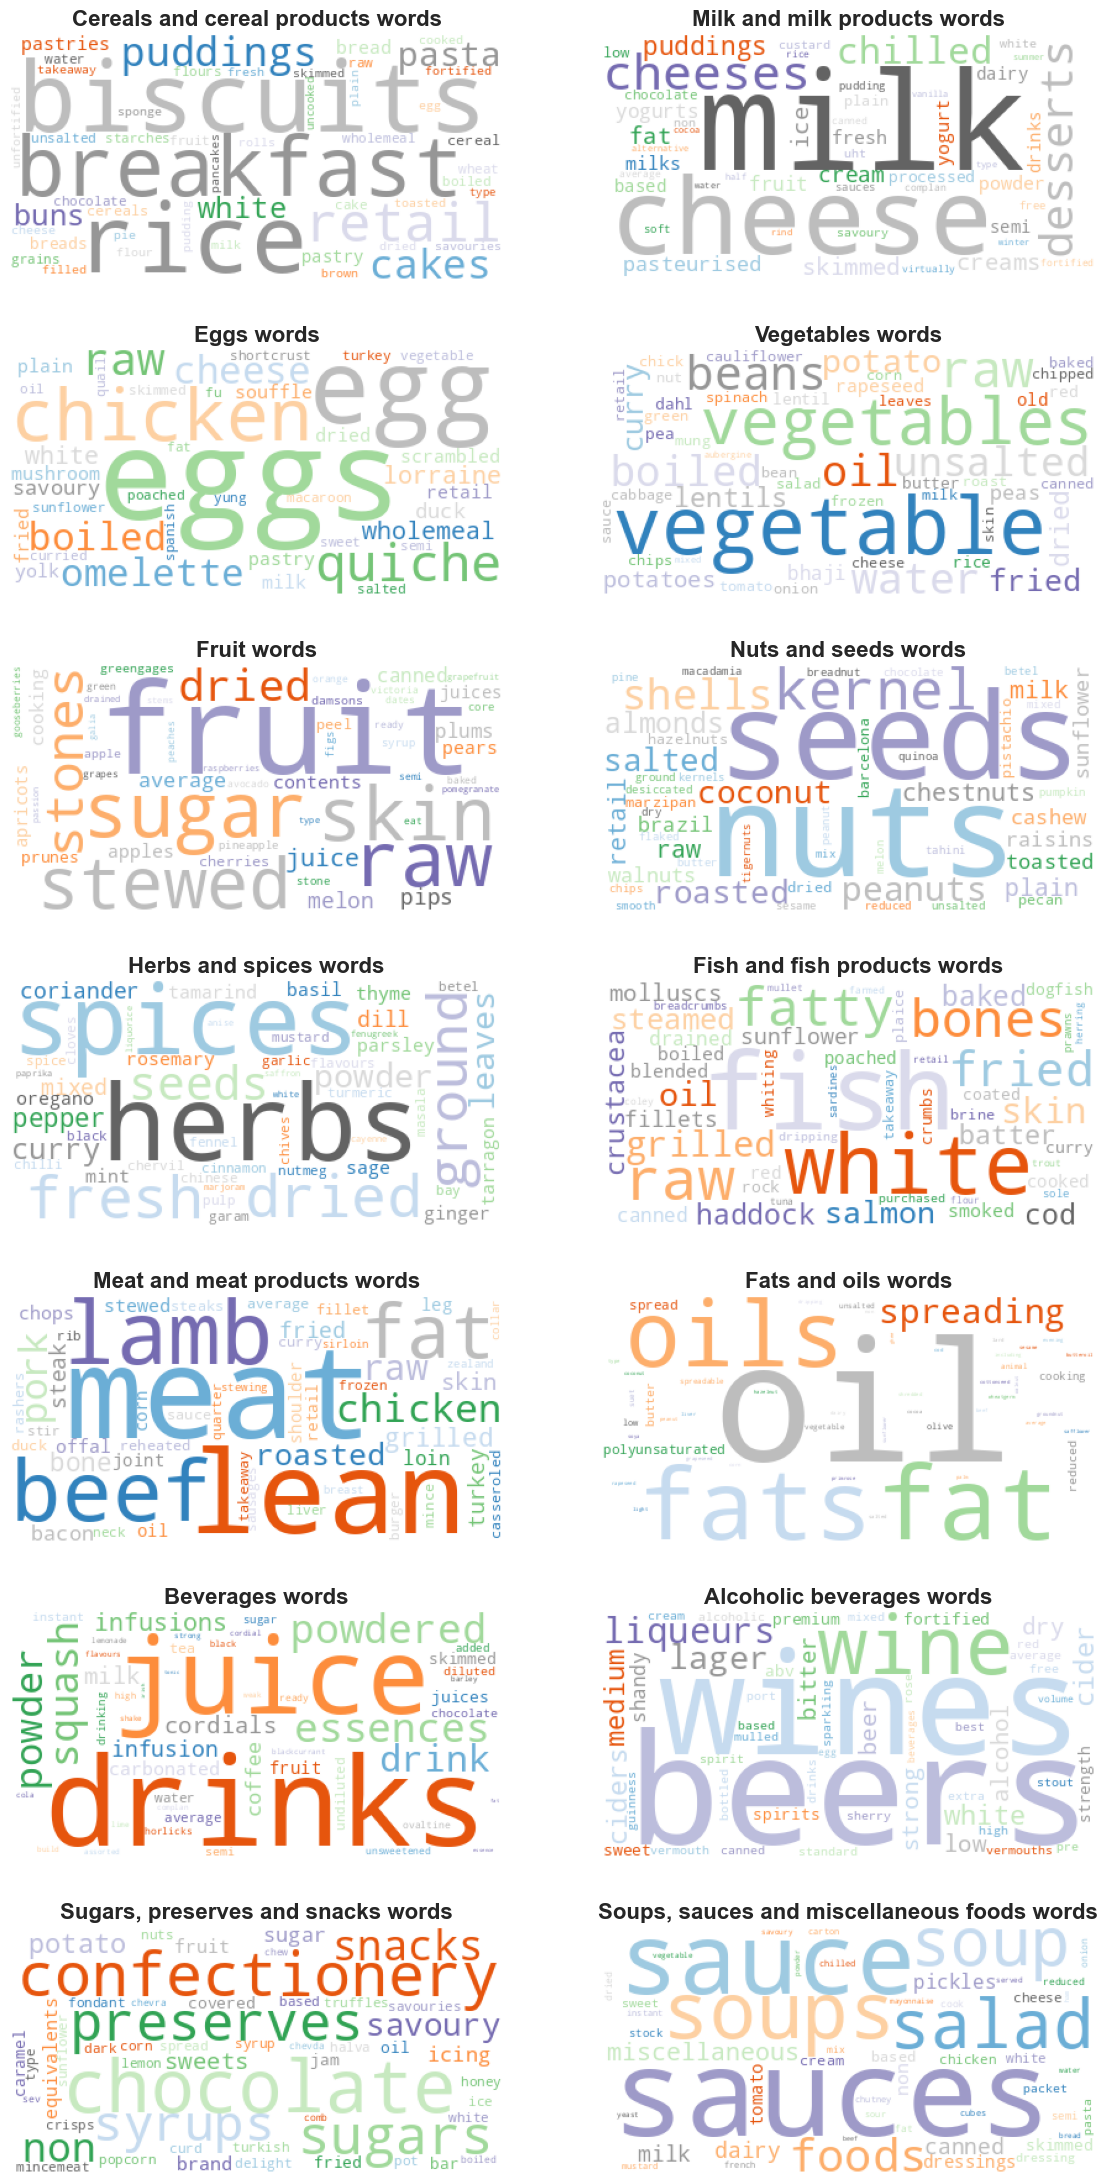

In [38]:
# Merge the Types back into the matrix and aggregate by Type
df_merged = pd.concat([X,df[['Type']]], axis=1)
size = len(COFID_group_types)//2

fig, ax = plt.subplots(size,2,figsize=(size*2,size*4))
for i, (j, name) in enumerate(COFID_group_types.items()):
    _data = df_merged.groupby('Type')[X.columns].sum().T.sort_values(j, ascending=False).loc[:, j]
    Cloud = WordCloud(background_color="white", colormap='tab20c', max_words=50).generate_from_frequencies(_data.head(50))
    ax[i//2,i%2].set_title(name + ' words', fontsize=16, fontweight='bold')
    ax[i//2,i%2].imshow(Cloud)
    ax[i//2,i%2].axis("off")
plt.show()

### Understanding the data

When building a machine learning model it is important to understand the dataset. We will look at this related to 'Type'.

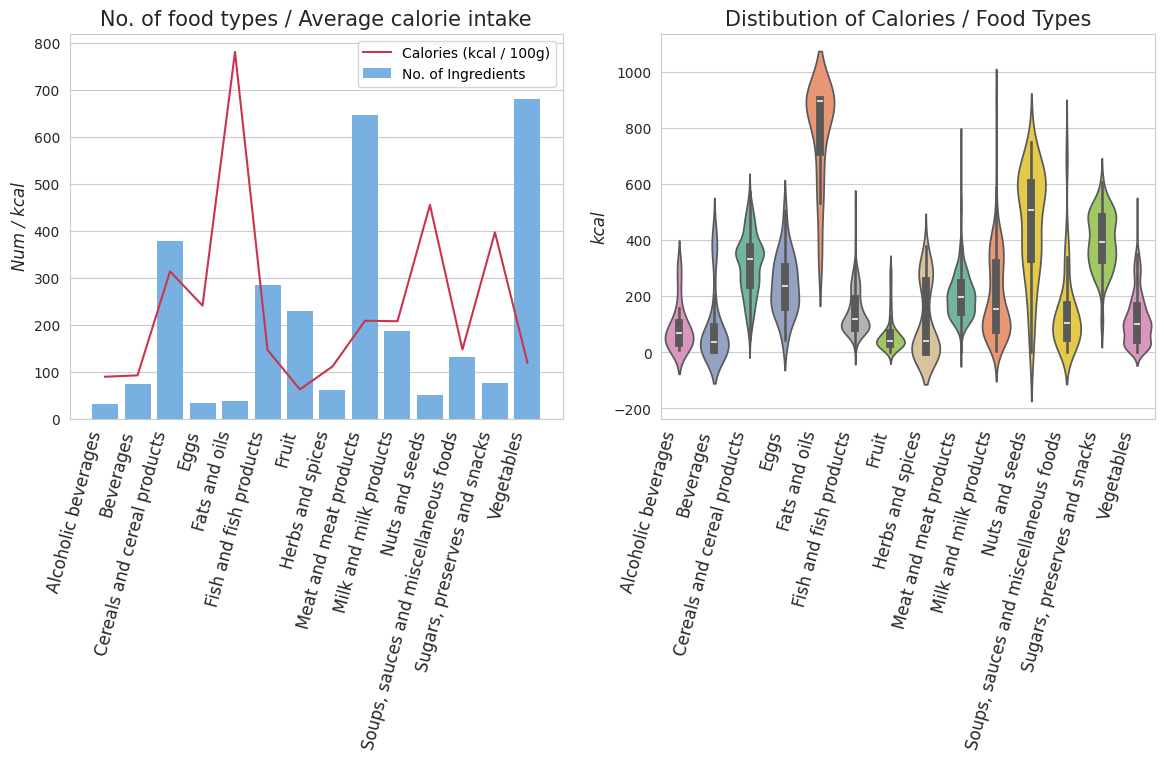

In [39]:
df_aggregate = df.groupby(['Type Name'])['Energy (kcal)'].agg([('Average (kcal)','mean'),('Total Rows','count')]).reset_index()

fig, ax = plt.subplots(1,2,figsize = (14, 5))
plt.style.use('default')
sns.barplot(df_aggregate, x='Type Name', y='Total Rows', label='No. of Ingredients', ax=ax[0], color=[0.4,0.7,0.95])
sns.lineplot(df_aggregate, x='Type Name', y='Average (kcal)', label='Calories (kcal / 100g)', ax=ax[0], color=[0.8,0.2,0.3])
sns.violinplot(data=df, x="Type Name", y="Energy (kcal)", hue="Type Name", legend=False, density_norm='width', order=sorted(df["Type Name"].unique()), ax=ax[1], palette="Set2")
plt.setp(ax[0].get_xticklabels(), rotation=75, ha='right', fontsize=12)
plt.setp(ax[1].get_xticklabels(), rotation=75, ha='right', fontsize=12)
ax[0].set_title('No. of food types / Average calorie intake', fontsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Num / kcal', fontsize=12, fontstyle='italic')
ax[0].legend()
ax[1].set_title('Distibution of Calories / Food Types', fontsize=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('kcal', fontsize=12, fontstyle='italic')
plt.show()

We can see there that Fats and Oils, Nuts and Seed are all calorific. Let's take a look at the correlation between other nutritional attributes.

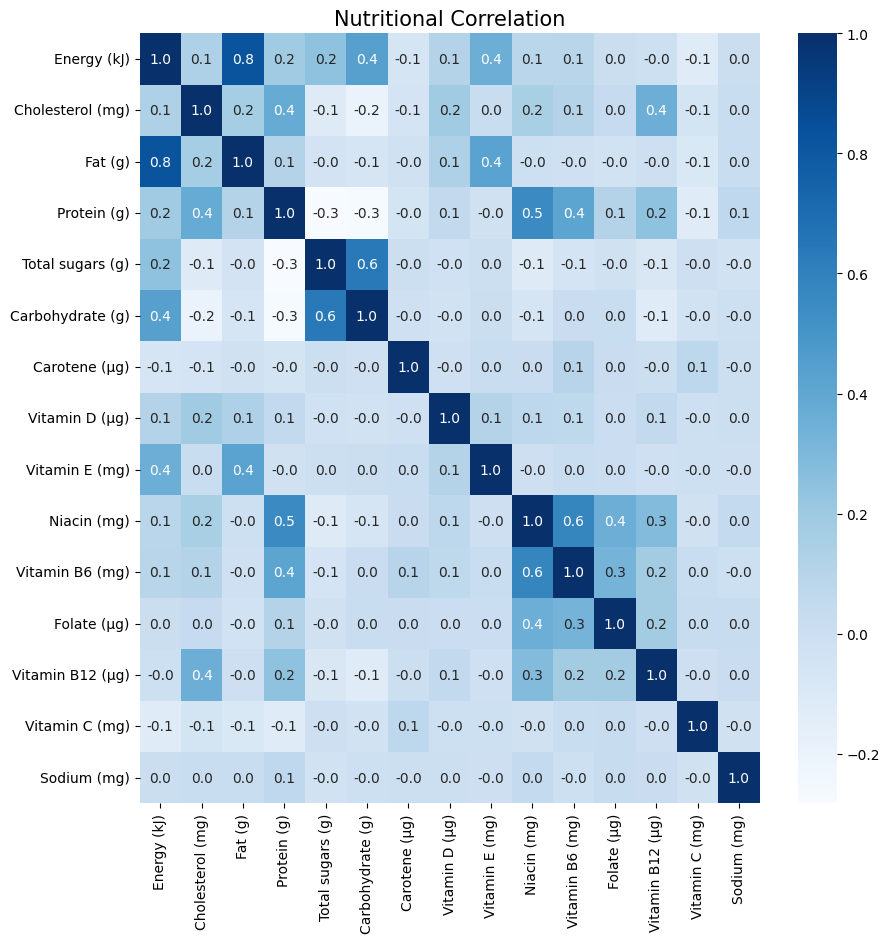

In [40]:
elements = layout.copy()
elements = [n for n in elements if n not in 'Energy (kcal)']

plt.subplots(figsize = (10, 10))
sns.heatmap(df[elements].corr(method = 'pearson'), annot=True, fmt=".1f", cmap='Blues')
plt.title('Nutritional Correlation', fontsize=15)
plt.show()

Let's take a look at Energy (kJ) in correlation to other nutrional attributes.

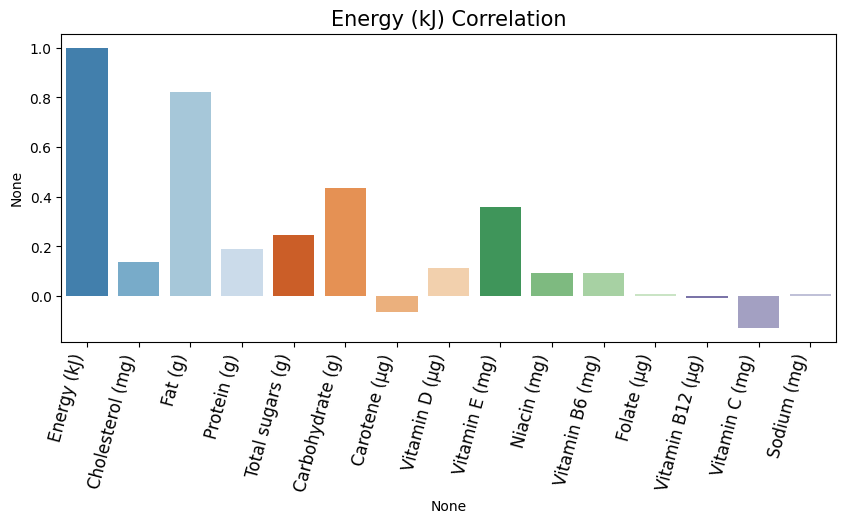

In [41]:
df_plot = df[elements].corrwith(df['Energy (kJ)'], method = 'pearson')
plt.subplots(figsize = (10, 4))
sns.barplot(x=df_plot.index, y=df_plot, hue=df_plot.index, legend=False, palette='tab20c')
plt.title('Energy (kJ) Correlation', fontsize=15)
plt.xticks(rotation=75, ha='right', fontsize=12)
plt.show()

## Determine the machine learning task

We have a regression task, as we are predicting a numerical value of Energy (kJ) based on food item names. 

We are going to perform supervised learning, so we will load our a variety of models and firstly perform hyperparameter optimization on them.


In [42]:
import optuna

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, root_mean_squared_error

import xgboost as xgb
import lightgbm as lgb

## Partition the data

Split the data into training and test data set.

As our dataset is an inventory of items, we can expect low accuracy on unseen data. We will therefore use a 90/10 split which is shuffled to try to incorporate a good mix of items into the very small test set.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Energy (kJ)'], test_size=0.10, shuffle=True, random_state=42)
X_train.shape, X_test.shape

((2603, 1432), (290, 1432))

## Choose the ML techniques

To choose the best model we will run a variety through HyperParameter Optimization (HPO) and then compare the results. I have choosen these models to as they are commonly suited to Regression tasks:

1. Random Forest Regressor
2. XGBoost Regressor
3. Support Vector Regressor
4. Partial Least Squares Regression
5. PCA with Linear Regression
6. Logistic Regression
7. K-Nearest Neighbours Regressor
8. LightGBM Regressor

Some of these models performed so badly they have been removed from the final results. This was namely PCA with Linear Regression and Support Vector Regressor.

### HyperParameter Optimization

The Optuna application is used for HPO to minimise RMSE as the benchmark for the optimisation problem.

**Please note: The HPO process can take a long time to run, so I have disabled each run, but the best results from the extensive trails set when bypassed below.**

In [44]:
def objective(trial, model_name):
    """
    Optuna singular objective function for minimising RMSE
    :param trial: study object
    :param model_name: Model name for multi-tasking
    :return: RMSE
    """
    if model_name == 'RandomForestRegressor':
        n_estimators = trial.suggest_int("n_estimators", 60, 200)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 6)
        max_depth = trial.suggest_int("max_depth", 200, 500)
        min_samples_leaf = trial.suggest_categorical("min_samples_leaf", [1,2,4])
        model = RandomForestRegressor(n_estimators=n_estimators, min_samples_split=min_samples_split, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=0)
    elif model_name == 'XGBRegressor':
        n_estimators = trial.suggest_int("n_estimators", 10, 200)
        max_depth = trial.suggest_int("max_depth", 2, 100)
        grow_policy = trial.suggest_categorical("grow_policy", ['depthwise', 'lossguide'])
        model = xgb.XGBRegressor(n_estimators=n_estimators, grow_policy=grow_policy, max_depth=max_depth, random_state=0, n_jobs=-1)
    elif model_name == 'SVR':
        n_components = trial.suggest_int("n_components", 1, 60)
        c = trial.suggest_float("c", 0., 1.0)
        epsilon = trial.suggest_float("epsilon", 0., 1.0)
        kernel = trial.suggest_categorical("kernel", ['linear', 'poly', 'rbf', 'sigmoid'])
        model = make_pipeline(StandardScaler(), PCA(n_components=n_components, random_state=0), SVR(kernel=kernel, epsilon=epsilon, C=c))
    elif model_name == 'PCALinearRegression':
        n_components = trial.suggest_int("n_components", 2, 4)
        model = make_pipeline(StandardScaler(), PCA(n_components=n_components, random_state=0), LinearRegression())
    elif model_name == 'Ridge':
        alpha = trial.suggest_float("alpha", 0., 1.0)
        fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])
        model = Ridge(random_state=0, alpha=alpha, fit_intercept=fit_intercept)
    elif model_name == 'KNeighborsRegressor':
        n_neighbors = trial.suggest_int("n_neighbors", 2, 20)
        weights = trial.suggest_categorical("weights", ['uniform', 'distance'])
        leaf_size = trial.suggest_int("leaf_size", 10, 80)
        model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, leaf_size=leaf_size, n_jobs=-1)
    elif model_name == 'LGBMRegressor':
        reg_alpha = trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True)
        reg_lambda = trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True)
        colsample_bytree = trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0])
        subsample = trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0])
        learning_rate = trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02])
        max_depth = trial.suggest_categorical('max_depth', [10,20,100])
        num_leaves = trial.suggest_int('num_leaves', 1, 1000)
        min_child_samples = trial.suggest_int('min_child_samples', 1, 300)
        min_data_per_groups = trial.suggest_int('min_data_per_groups', 1, 100)
        model = lgb.LGBMRegressor(reg_alpha=reg_alpha, reg_lambda=reg_lambda, colsample_bytree=colsample_bytree, subsample=subsample, learning_rate=learning_rate, max_depth=max_depth, num_leaves=num_leaves, min_child_samples=min_child_samples, min_data_per_groups=min_data_per_groups, metric='rmse', n_estimators=20000, random_state=0, verbosity=-1)
    else: #model_name == 'PLSRegression':
        n_components = trial.suggest_int("n_components", 1, 60)
        # max_iter = trial.suggest_int("max_iter", 100, 5000)
        scale = trial.suggest_categorical("scale", [True, False])
        tol = trial.suggest_float("tol", 1e-08, 1e-1)
        model = PLSRegression(n_components=n_components,scale=scale, tol=tol)
    
    if model_name == 'LGBMRegressor':
        model.fit(X_train, y_train.to_numpy().reshape(-1),eval_set=[(X_test, y_test)])
    else:
        model.fit(X_train, y_train.to_numpy().reshape(-1))

    rmse = root_mean_squared_error(y_test.to_numpy().reshape(-1), model.predict(X_test))
    return rmse

hpo_results = {}

### HyperParameter Trails

In [45]:
study_name = 'Ridge'
if True:
    study = optuna.create_study(study_name=study_name, direction='minimize') # build study
    study.optimize(lambda trial: objective(trial, study_name), n_trials=100) # objective function
    hpo_results[study_name] = study.best_params
else:
    # Considered over extensive trials
    hpo_results[study_name] = {'alpha': 0.8875897211542383, 'fit_intercept': True}
    
print('[HPO] Best parameters for the %s are %s' % (study_name, hpo_results[study_name]))

[I 2024-04-23 16:49:49,602] A new study created in memory with name: Ridge
[I 2024-04-23 16:49:49,893] Trial 0 finished with value: 383.95505805006115 and parameters: {'alpha': 0.04425083782539585, 'fit_intercept': True}. Best is trial 0 with value: 383.95505805006115.
[I 2024-04-23 16:49:50,330] Trial 1 finished with value: 383.96516381654675 and parameters: {'alpha': 0.6571793557143886, 'fit_intercept': False}. Best is trial 0 with value: 383.95505805006115.
[I 2024-04-23 16:49:50,667] Trial 2 finished with value: 353.09628628511246 and parameters: {'alpha': 0.35783557538305366, 'fit_intercept': True}. Best is trial 2 with value: 353.09628628511246.
[I 2024-04-23 16:49:51,056] Trial 3 finished with value: 346.34516496959685 and parameters: {'alpha': 0.6949805637947702, 'fit_intercept': True}. Best is trial 3 with value: 346.34516496959685.
[I 2024-04-23 16:49:51,373] Trial 4 finished with value: 393.90905229366246 and parameters: {'alpha': 0.31631526132469034, 'fit_intercept': False}

[HPO] Best parameters for the Ridge are {'alpha': 0.9999824268016606, 'fit_intercept': True}


In [46]:
study_name = 'LGBMRegressor'
if True:
    study = optuna.create_study(study_name=study_name, direction='minimize') # build study
    study.optimize(lambda trial: objective(trial, study_name), n_trials=10) # objective function
    hpo_results[study_name] = study.best_params
else:
    # Considered over extensive trials
    hpo_results[study_name] = {'reg_alpha': 2.2904656736019056, 'reg_lambda': 4.970446799048115, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 409, 'min_child_samples': 1, 'min_data_per_groups': 53}

# Show the best params at the end of the study
print('[HPO] Best parameters for the %s are %s' % (study_name, hpo_results[study_name]))

[I 2024-04-23 16:50:23,276] A new study created in memory with name: LGBMRegressor
[I 2024-04-23 16:50:35,429] Trial 0 finished with value: 653.0588908444 and parameters: {'reg_alpha': 0.4874114159201396, 'reg_lambda': 0.44822254288099606, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 280, 'min_child_samples': 252, 'min_data_per_groups': 29}. Best is trial 0 with value: 653.0588908444.
[I 2024-04-23 16:51:39,427] Trial 1 finished with value: 421.12448661700796 and parameters: {'reg_alpha': 0.2319196370906959, 'reg_lambda': 0.076009910249554, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 424, 'min_child_samples': 26, 'min_data_per_groups': 55}. Best is trial 1 with value: 421.12448661700796.
[I 2024-04-23 16:52:42,243] Trial 2 finished with value: 602.6810395600062 and parameters: {'reg_alpha': 0.001008454361545233, 'reg_lambda': 1.1343981684488926, 'colsample_bytree': 0.5, 'subsample':

[HPO] Best parameters for the LGBMRegressor are {'reg_alpha': 0.003370817857742662, 'reg_lambda': 0.4747648496969446, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 10, 'num_leaves': 637, 'min_child_samples': 1, 'min_data_per_groups': 75}


In [47]:
study_name = 'PLSRegression'
if True:
    study = optuna.create_study(study_name=study_name, direction='minimize') # build study
    study.optimize(lambda trial: objective(trial, study_name), n_trials=100) # objective function
    hpo_results[study_name] = study.best_params
    optuna.visualization.plot_slice(study)
else:
    # Considered over extensive trials
    hpo_results[study_name] = {'n_components': 16, 'scale': False, 'tol': 0.07206953263469583}

# Show the best params at the end of the study
print('[HPO] Best parameters for the %s are %s' % (study_name, hpo_results[study_name]))

[I 2024-04-23 17:01:38,064] A new study created in memory with name: PLSRegression
[I 2024-04-23 17:01:38,771] Trial 0 finished with value: 402.59825072133356 and parameters: {'n_components': 54, 'scale': True, 'tol': 0.013780558430934849}. Best is trial 0 with value: 402.59825072133356.
[I 2024-04-23 17:01:39,503] Trial 1 finished with value: 402.20195543574107 and parameters: {'n_components': 52, 'scale': True, 'tol': 0.0008759059191074961}. Best is trial 1 with value: 402.20195543574107.
[I 2024-04-23 17:01:39,911] Trial 2 finished with value: 363.9570913988888 and parameters: {'n_components': 27, 'scale': False, 'tol': 0.02098267024309325}. Best is trial 2 with value: 363.9570913988888.
[I 2024-04-23 17:01:40,183] Trial 3 finished with value: 356.9665342698842 and parameters: {'n_components': 23, 'scale': False, 'tol': 0.07115715288216265}. Best is trial 3 with value: 356.9665342698842.
[I 2024-04-23 17:01:40,884] Trial 4 finished with value: 402.8052725150811 and parameters: {'n_c

[HPO] Best parameters for the PLSRegression are {'n_components': 17, 'scale': False, 'tol': 0.09033506753656811}


In [48]:
study_name = 'RandomForestRegressor'
if True:
    study = optuna.create_study(study_name=study_name, direction='minimize') # build study
    study.optimize(lambda trial: objective(trial, study_name), n_trials=100) # objective function
    hpo_results[study_name] = study.best_params
else:
    # Considered over extensive trials
    hpo_results[study_name] = {'n_estimators': 66, 'min_samples_split': 2, 'max_depth': 244, 'min_samples_leaf': 1}

# Show the best params at the end of the study
print('[HPO] Best parameters for the %s are %s' % (study_name, hpo_results[study_name]))

[I 2024-04-23 17:02:05,478] A new study created in memory with name: RandomForestRegressor
[I 2024-04-23 17:02:13,017] Trial 0 finished with value: 334.31819878142505 and parameters: {'n_estimators': 125, 'min_samples_split': 5, 'max_depth': 215, 'min_samples_leaf': 4}. Best is trial 0 with value: 334.31819878142505.
[I 2024-04-23 17:02:23,504] Trial 1 finished with value: 334.6610191354361 and parameters: {'n_estimators': 171, 'min_samples_split': 4, 'max_depth': 468, 'min_samples_leaf': 4}. Best is trial 0 with value: 334.31819878142505.
[I 2024-04-23 17:02:35,983] Trial 2 finished with value: 303.1698423194757 and parameters: {'n_estimators': 155, 'min_samples_split': 3, 'max_depth': 416, 'min_samples_leaf': 1}. Best is trial 2 with value: 303.1698423194757.
[I 2024-04-23 17:02:49,375] Trial 3 finished with value: 301.7959320248577 and parameters: {'n_estimators': 162, 'min_samples_split': 2, 'max_depth': 447, 'min_samples_leaf': 1}. Best is trial 3 with value: 301.7959320248577.
[I

[HPO] Best parameters for the RandomForestRegressor are {'n_estimators': 147, 'min_samples_split': 2, 'max_depth': 387, 'min_samples_leaf': 1}


In [49]:
study_name = 'XGBRegressor'
if True:
    study = optuna.create_study(study_name=study_name, direction='minimize') # build study
    study.optimize(lambda trial: objective(trial, study_name), n_trials=100) # objective function
    hpo_results[study_name] = study.best_params
else:
    # Considered over extensive trials
    hpo_results[study_name] = {'n_estimators': 93, 'max_depth': 42, 'grow_policy': 'depthwise'}

# Show the best params at the end of the study
print('[HPO] Best parameters for the %s are %s' % (study_name, hpo_results[study_name]))

[I 2024-04-23 17:20:17,135] A new study created in memory with name: XGBRegressor
[I 2024-04-23 17:20:19,460] Trial 0 finished with value: 304.3059594593326 and parameters: {'n_estimators': 98, 'max_depth': 47, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 304.3059594593326.
[I 2024-04-23 17:20:20,058] Trial 1 finished with value: 306.75412904204194 and parameters: {'n_estimators': 15, 'max_depth': 29, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 304.3059594593326.
[I 2024-04-23 17:20:20,363] Trial 2 finished with value: 313.57900821924113 and parameters: {'n_estimators': 19, 'max_depth': 34, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 304.3059594593326.
[I 2024-04-23 17:20:21,794] Trial 3 finished with value: 305.41512202147425 and parameters: {'n_estimators': 115, 'max_depth': 65, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 304.3059594593326.
[I 2024-04-23 17:20:22,212] Trial 4 finished with value: 305.82764059119006 and parameters: {'

[HPO] Best parameters for the XGBRegressor are {'n_estimators': 134, 'max_depth': 13, 'grow_policy': 'lossguide'}


In [50]:
study_name = 'KNeighborsRegressor'
if True:
    study = optuna.create_study(study_name=study_name, direction='minimize') # build study
    study.optimize(lambda trial: objective(trial, study_name), n_trials=100) # objective function
    hpo_results[study_name] = study.best_params
else:
    # Considered over extensive trials
    hpo_results[study_name] = {'n_neighbors': 4, 'weights': 'distance', 'leaf_size': 55}

# Show the best params at the end of the study
print('[HPO] Best parameters for the %s are %s' % (study_name, hpo_results[study_name]))

[I 2024-04-23 17:23:22,597] A new study created in memory with name: KNeighborsRegressor
[I 2024-04-23 17:23:23,588] Trial 0 finished with value: 369.32597608810033 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'leaf_size': 55}. Best is trial 0 with value: 369.32597608810033.
[I 2024-04-23 17:23:24,404] Trial 1 finished with value: 350.44210040753705 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'leaf_size': 58}. Best is trial 1 with value: 350.44210040753705.
[I 2024-04-23 17:23:25,048] Trial 2 finished with value: 390.61346547935733 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'leaf_size': 17}. Best is trial 1 with value: 350.44210040753705.
[I 2024-04-23 17:23:25,610] Trial 3 finished with value: 353.3285092684974 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'leaf_size': 28}. Best is trial 1 with value: 350.44210040753705.
[I 2024-04-23 17:23:26,410] Trial 4 finished with value: 374.39816843413735 and parameters: {'n_neighbors': 19, 

[HPO] Best parameters for the KNeighborsRegressor are {'n_neighbors': 5, 'weights': 'distance', 'leaf_size': 40}


### HyperParameter Results

Please see all results of the HPO tuning.

In [51]:
for x, y in hpo_results.items():
    print('[HPO] %s: %s' % (x, y))

[HPO] Ridge: {'alpha': 0.9999824268016606, 'fit_intercept': True}
[HPO] LGBMRegressor: {'reg_alpha': 0.003370817857742662, 'reg_lambda': 0.4747648496969446, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 10, 'num_leaves': 637, 'min_child_samples': 1, 'min_data_per_groups': 75}
[HPO] PLSRegression: {'n_components': 17, 'scale': False, 'tol': 0.09033506753656811}
[HPO] RandomForestRegressor: {'n_estimators': 147, 'min_samples_split': 2, 'max_depth': 387, 'min_samples_leaf': 1}
[HPO] XGBRegressor: {'n_estimators': 134, 'max_depth': 13, 'grow_policy': 'lossguide'}
[HPO] KNeighborsRegressor: {'n_neighbors': 5, 'weights': 'distance', 'leaf_size': 40}


## Using the models on test data

Now, we have tuned models, we will utilise them to predict the Energy (kJ) of the food items and return results for evaluation.

The HyperParameter Optimization (HPO) results are passed down to the models below for re-training.

The ModelRecorder class below handles the model results and data across the trials.

In [52]:
class ModelRecorder(object):
    def __init__(self, test_y):
        self.model_scores = {}
        self.model_data = {}
        self.test_y = test_y
        pass
    def __call__(self):
        pass
    def set_scores(self, model_name, y_true, y_pred, ext={}) -> None:
        self.model_scores[model_name] = self._regression_scores(y_true, y_pred, ext)
        self.model_data[model_name] = y_pred
    def get_scores(self) -> dict:
        return self.model_scores
    def get_scores_df(self) -> pd.DataFrame:
        return pd.DataFrame(self.model_scores).T
    def get_data_df(self, model_name) -> pd.DataFrame:
        return pd.DataFrame(self.model_data[model_name])
    def get_test_df(self) -> pd.DataFrame:
        return pd.DataFrame(self.test_y)
    @staticmethod
    def _regression_scores(y_true, y_pred, ext={}) -> dict:
        mse = mean_squared_error(y_true, y_pred)
        rmse = root_mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        variance = explained_variance_score(y_true, y_pred)
        ext.update({'MSE': np.round(mse, 6), 'RMSE': np.round(rmse, 6), 'R2': np.round(r2, 6),'Variance': np.round(variance, 6)})
        print(ext)
        return ext
    def get_modelresults(self, model_name) -> pd.DataFrame:
        construct = X_test.apply(lambda x: " ".join(x[x != 0.].index), axis=1)
        df_p = pd.DataFrame(construct, columns=['Food Cloud'])
        df_p['Actual'] = self.test_y
        df_p[model_name + '_Predicted'] = self.model_data[model_name]
        df_p[model_name + '_Variance'] = df_p['Actual'] - df_p[model_name + '_Predicted']
        df_p[model_name + '_Accuracy'] = 1 - (df_p['Actual'] - df_p[model_name + '_Predicted']) / df_p['Actual']
        return df_p
    def get_results(self) -> pd.DataFrame:
        construct = X_test.apply(lambda x: " ".join(x[x != 0.].index), axis=1)
        df_p = pd.DataFrame(construct, columns=['Food Cloud'])
        df_p['Actual'] = self.test_y
        for n in self.model_data.keys():
            df_p[name + '_Predicted'] = self.model_data[n]
        return df_p

model_results = ModelRecorder(y_test)

### Principal Component Analysis (PCA) with Linear Regression
This was too poor to be considered, so has been removed from the final results
{'Train_Accuracy': 0.05321960715721663, 'Train_RMSE': 613.0170565484234, 'MSE': 438643.680405, 'RMSE': 662.301805, 'R2': 0.040811, 'Variance': 0.044149}

### Ridge Regression

Please see performance metrics below.

In [53]:
rtl = {}
clf = Ridge(**hpo_results['Ridge'], random_state=0)
clf.fit(X_train, y_train)
rtl['Train_Accuracy'] = clf.score(X_train, y_train)
rtl['Train_RMSE'] = root_mean_squared_error(y_train, clf.predict(X_train))
y_pred = clf.predict(X_test)
model_results.set_scores("Ridge", y_test, y_pred, rtl)

{'Train_Accuracy': 0.8730849627476922, 'Train_RMSE': 223.6839314424195, 'MSE': 118994.881734, 'RMSE': 344.956348, 'R2': 0.736731, 'Variance': 0.737258}


### Regression using LightGBM

Please see performance metrics below.

In [54]:
rtl = {}
gbm = lgb.LGBMRegressor(**hpo_results['LGBMRegressor'], metric='rmse', random_state=0, n_estimators=200, verbosity=-1, n_jobs=-1)
gbm.fit(X_train, y_train)
rtl['Train_Accuracy'] = gbm.score(X_train, y_train)
rtl['Train_RMSE'] = root_mean_squared_error(y_train, gbm.predict(X_train))
y_pred = gbm.predict(X_test)
model_results.set_scores("LGBMRegressor", y_test, y_pred, rtl)

{'Train_Accuracy': 0.6996638159231363, 'Train_RMSE': 344.09794242889456, 'MSE': 151538.701255, 'RMSE': 389.279721, 'R2': 0.66473, 'Variance': 0.66498}


### Partical Least Squares Regression with ReLU Activation

This is a modififed version of the PLSRegression model with ReLU activation function which clips off negative predictions. Please see performance metrics below.

In [55]:
rtl = {}
pls = PLSRegression(**hpo_results['PLSRegression'])
pls.fit(X_train, y_train)
rtl['Train_Accuracy'] = pls.score(X_train, y_train)
rtl['Train_RMSE'] = root_mean_squared_error(y_train, pls.predict(X_train))
y_pred = pls.predict(X_test)
model_results.set_scores("PLSRegressionReLU", y_test, y_pred.clip(0), rtl)

{'Train_Accuracy': 0.8588544262160714, 'Train_RMSE': 235.89127525063114, 'MSE': 113172.894445, 'RMSE': 336.411793, 'R2': 0.749612, 'Variance': 0.751116}


### Random Forest Regressor

Please see performance metrics below.

In [56]:
rtl = {}
rfc = RandomForestRegressor(**hpo_results['RandomForestRegressor'], random_state=0)
rfc.fit(X_train, y_train.to_numpy().reshape(-1))
rtl['Train_Accuracy'] = rfc.score(X_train, y_train)
rtl['Train_RMSE'] = root_mean_squared_error(y_train, rfc.predict(X_train))
y_pred = rfc.predict(X_test)
model_results.set_scores("RandomForestRegressor", y_test, y_pred, rtl)

{'Train_Accuracy': 0.963901493914044, 'Train_RMSE': 119.2951701902762, 'MSE': 90155.418618, 'RMSE': 300.258919, 'R2': 0.800537, 'Variance': 0.800701}


### XGBoost for Regression

Please see performance metrics below.

In [57]:
rtl = {}
xbst = xgb.XGBRegressor(**hpo_results['XGBRegressor'])
xbst.fit(X_train, y_train)
rtl['Train_Accuracy'] = xbst.score(X_train, y_train)
rtl['Train_RMSE'] = root_mean_squared_error(y_train, xbst.predict(X_train))
y_pred = xbst.predict(X_test)
model_results.set_scores("XGBRegressor", y_test, y_pred, rtl)

{'Train_Accuracy': 0.9779538462616425, 'Train_RMSE': 93.2276339469559, 'MSE': 85228.494966, 'RMSE': 291.939197, 'R2': 0.811437, 'Variance': 0.811587}


### Support Vector Regression with PCA
SVR with PCA was removed as accuracy was very poor, and it was predicting the mean.
{'Train_Accuracy': 0.32951469051999827, 'Train_RMSE': 515.8727220308577, 'MSE': 352867.16158, 'RMSE': 594.02623, 'R2': 0.228379, 'Variance': 0.261461}

### K-Nearest Neighbours Regressor

Please see performance metrics below.

In [58]:
rtl = {}
knn = KNeighborsRegressor(**hpo_results['KNeighborsRegressor'], n_jobs=-1)
knn.fit(X_train, y_train)
rtl['Train_Accuracy'] = knn.score(X_train, y_train)
rtl['Train_RMSE'] = root_mean_squared_error(y_train, knn.predict(X_train))
y_pred = knn.predict(X_test)
model_results.set_scores("KNeighborsRegressor", y_test, y_pred, rtl)

{'Train_Accuracy': 0.9963041485251817, 'Train_RMSE': 38.171172594130645, 'MSE': 118767.352425, 'RMSE': 344.626395, 'R2': 0.737235, 'Variance': 0.737707}


## Interpret the results

Now to compare the algorithms against each other to determine the most appropriate to use.

### Examine Performance Metrics

In [59]:
results_df = model_results.get_scores_df()
print(results_df.to_markdown())
#results_df

|                       |   Train_Accuracy |   Train_RMSE |      MSE |    RMSE |       R2 |   Variance |
|:----------------------|-----------------:|-------------:|---------:|--------:|---------:|-----------:|
| Ridge                 |         0.873085 |     223.684  | 118995   | 344.956 | 0.736731 |   0.737258 |
| LGBMRegressor         |         0.699664 |     344.098  | 151539   | 389.28  | 0.66473  |   0.66498  |
| PLSRegressionReLU     |         0.858854 |     235.891  | 113173   | 336.412 | 0.749612 |   0.751116 |
| RandomForestRegressor |         0.963901 |     119.295  |  90155.4 | 300.259 | 0.800537 |   0.800701 |
| XGBRegressor          |         0.977954 |      93.2276 |  85228.5 | 291.939 | 0.811437 |   0.811587 |
| KNeighborsRegressor   |         0.996304 |      38.1712 | 118767   | 344.626 | 0.737235 |   0.737707 |


Let's compare RMSE and Accuracy from training to prediction

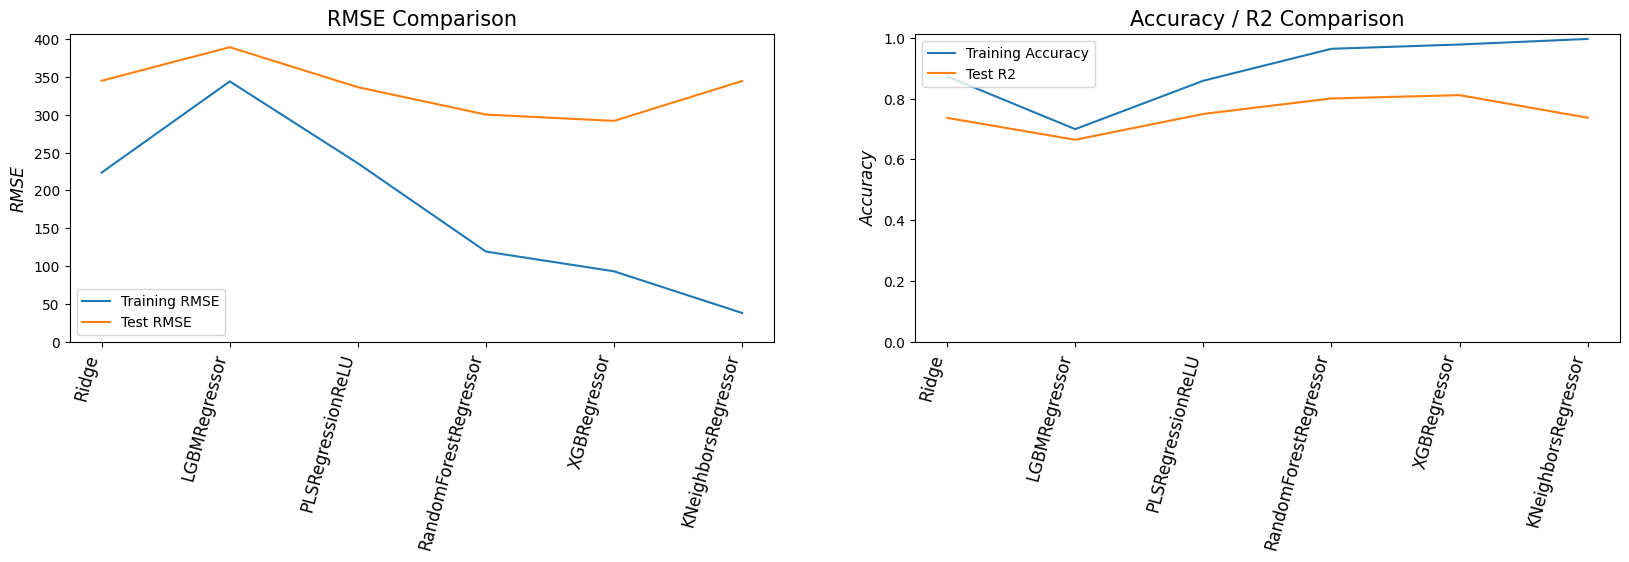

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (20,4))
ax[0].plot(results_df.index, results_df['Train_RMSE'], label='Training RMSE')
ax[0].plot(results_df.index, results_df['RMSE'], label='Test RMSE')
ax[0].set_title('RMSE Comparison', fontsize=15)
ax[0].set_ylabel('RMSE', fontsize=12, fontstyle='italic')
ax[1].plot(results_df.index, results_df['Train_Accuracy'], label='Training Accuracy')
ax[1].plot(results_df.index, results_df['R2'], label='Test R2')
ax[1].set_title('Accuracy / R2 Comparison', fontsize=15)
ax[1].set_ylabel('Accuracy', fontsize=12, fontstyle='italic')
plt.setp(ax[0].get_xticklabels(), rotation=75, ha='right', fontsize=12)
plt.setp(ax[1].get_xticklabels(), rotation=75, ha='right', fontsize=12)
ax[0].set_ylim(bottom=0)
ax[1].set_ylim(bottom=0)
ax[0].legend(loc="lower left")
ax[1].legend(loc="upper left")
plt.show()

### Investigate the Best Model

Given the small size of the test set, we can visualise the predicted vs actual values.

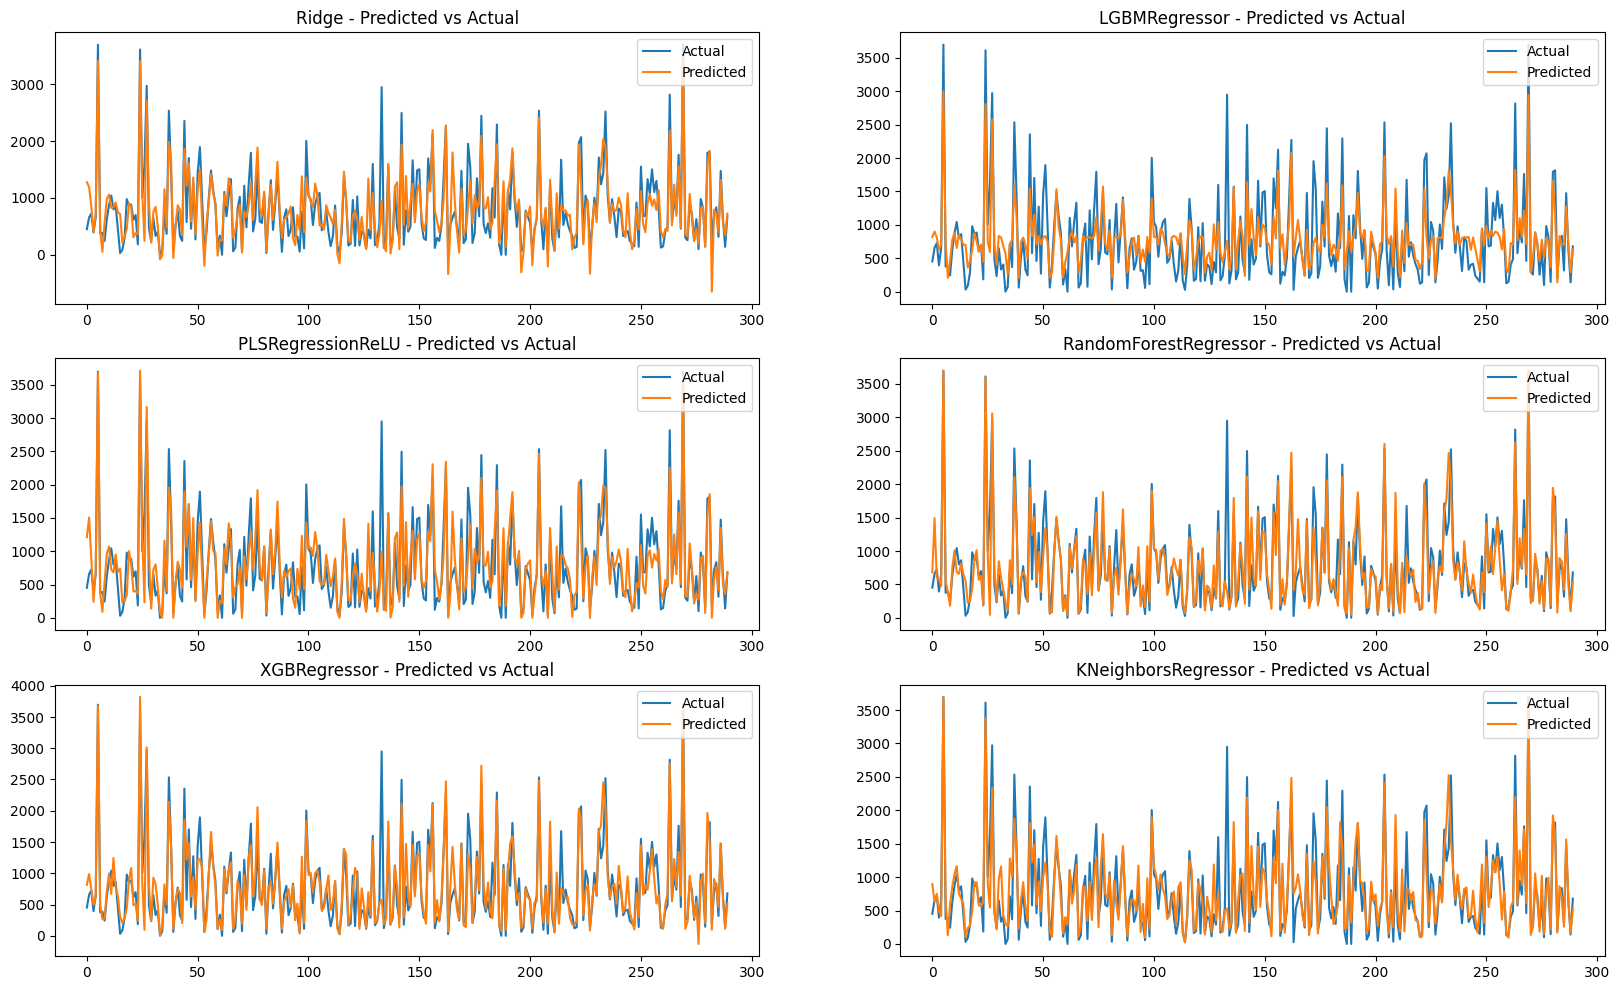

In [61]:
test_y = model_results.get_test_df().to_numpy().reshape(-1)
n = range(len(test_y))

_, ax = plt.subplots(3,2,figsize=(20,12))
for i, index in enumerate(results_df.index):
    sns.lineplot(x = n, y = test_y, ax=ax[i//2,i%2], label='Actual')
    sns.lineplot(x = n, y = model_results.get_data_df(index).to_numpy().reshape(-1), ax=ax[i//2,i%2], label='Predicted')
    ax[i//2,i%2].set_title(index + ' - Predicted vs Actual')
    ax[i//2,i%2].legend(loc='upper right')

### Findings

From the contenders, this is the evaluation:

1. **Ridge Regression**:
   - Moderate training accuracy
   - Moderate RMSE values on both training and test data
   - Good \(R2\) score, indicating a decent amount of variance explained

2. **LGBMRegressor**:
   - Lower training accuracy
   - Higher RMSE values, indicating larger errors
   - Lower \(R2\) score, which shows it explains less variance relative to other models

3. **PLSRegressionReLU**:
   - High training accuracy
   - Moderate RMSE values
   - Very good \(R2\) score, indicating that it explains a substantial amount of variance

4. **RandomForestRegressor**:
   - Very high training accuracy
   - Lowest RMSE values among all models, showing smaller prediction errors
   - The highest \(R2\) score, indicating the best performance in terms of explaining variance

5. **XGBRegressor**:
   - Extremely high training accuracy
   - Very low training RMSE but slightly higher test RMSE compared to RandomForestRegressor
   - High \(R2\) score, similar to RandomForestRegressor but slightly lower

6. **KNeighborsRegressor**:
   - Highest training accuracy
   - Very low training RMSE but higher test RMSE, indicating possible overfitting
   - Lower \(R2\) score compared to RandomForestRegressor and XGBRegressor

Overall, RandomForestRegressor appears to be the best choice based on its exceptionally high accuracy, the lowest error metrics (RMSE and MSE), and the highest R2. XGBRegressor is a close second, with excellent performance across all metrics, but slightly lower accuracy and would be a good choice in the case of overfitting.

## Deploy the ML technique

Given the nature of the data, we are going to train our model on the entire data set then use an example to predict the Energy (kJ) of the food items. This gives us slightly better understanding of accuracy in the real world, should you wish to research it further.

In [62]:
rfc = RandomForestRegressor(**hpo_results['RandomForestRegressor'], random_state=0)
rfc.fit(X, df['Energy (kJ)'])

RandomForestRegressor(max_depth=387, n_estimators=147, random_state=0)

### Test an external recipe

**Meatballs with fennel & balsamic beans & courgette noodles**

Source: [https://www.bbcgoodfood.com/recipes/meatballs-fennel-balsamic-beans-courgette-noodles](https://www.bbcgoodfood.com/recipes/meatballs-fennel-balsamic-beans-courgette-noodles)

kcal: 380
kJ: 1590

**Ingredients**
400g lean beef steak mince
2 tsp dried oregano
1 large egg
8 garlic cloves, 1 finely grated, the other sliced
1-2 tbsp olive oil
1 fennel bulb, finely chopped, fronds reserved
2 carrots, finely chopped
500g carton passata
4 tbsp balsamic vinegar
600ml reduced-salt vegetable bouillon

**For the courgette noodles**
1 tsp rapeseed oil
1-2 large courgettes, cut into noodles with a julienne peeler or spiralizer
350g frozen soya beans, thawed


In [63]:
# Create a dataframe of these ingredients
df_recipe = pd.DataFrame(['lean beef steak mince', 'dried oregano', 'large egg', 'garlic cloves', 'olive oil', 'fennel bulb', 'carrots', 'passata', 'balsamic vinegar', 'reduced-salt vegetable bouillon',  'rapeseed oil', 'courgettes', 'soya beans'], columns=['Ingredient Names'])

# vectorize the 'Ingredient Names' column
_X_test = tokenizer.transform(df_recipe['Ingredient Names'].astype(str))
X_vect = pd.DataFrame(_X_test.todense(), index=df_recipe['Ingredient Names'].index, columns=features)
X_vect = X_vect.filter(regex='^\D', axis=1)

In [64]:
y_pred = rfc.predict(X_vect)
df_recipe['Predicted Energy (kJ) / 100g'] = y_pred
df_recipe

,Ingredient Names,Predicted Energy (kJ) / 100g
0,lean beef steak mince,772.959184
1,dried oregano,614.190476
2,large egg,726.469388
3,garlic cloves,627.972789
4,olive oil,699.292517
5,fennel bulb,623.931973
6,carrots,623.931973
7,passata,623.931973
8,balsamic vinegar,456.714286
9,reduced-salt vegetable bouillon,479.986395
